In [ ]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 

from typing import Any, Optional, List
import asyncio
import nest_asyncio
nest_asyncio.apply()

import qubx
%qubxd dev 

%load_ext autoreload
%autoreload 2

from qubx import lookup, logger
from qubx.core.strategy import IStrategy, StrategyContext
from qubx.impl.ccxt_connector import CCXTDataConnector
from qubx.impl.ccxt_trading import CCXTSyncTradingConnector
from qubx.utils.runner import get_account_config
from qubx.pandaz import scols

In [2]:
%load_ext autoreload
%autoreload 2
from strats.teststrat import FlipFlopStrat

symbols = ['PEPE', 'SHIB', 'XVG', 'BOME', 'CKB', 'GALA', 'LINK'] 
instruments = [lookup.find_instrument('BINANCE', s, 'USDT') for s in symbols]

auth = get_account_config('binance-qbx', './configs/.env')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
brok = CCXTSyncTradingConnector('binance', **auth)
data = CCXTDataConnector('binance', brok, **auth)

ctx = StrategyContext(
    FlipFlopStrat(), dict(
        capital_invested=100,
        trading_allowed=False
    ), 
    data, brok, instruments=instruments,  # type: ignore
    md_subscription=dict(type='ohlc', timeframe='5Min', nback=100),
    trigger_spec='1Min -5Sec'
)
S = ctx.strategy

2024-07-10 15:48:15.130 [ ℹ️ ] BINANCE loading ...
2024-07-10 15:48:24.230 [ ℹ️ ] Loading account data for Binance
2024-07-10 15:48:24.549 [ ℹ️ ]  > 0.048 of BNB is reserved from trading
2024-07-10 15:48:24.565 [ ℹ️ ] binance initialized - current time 2024-07-10T12:48:24.798704640
2024-07-10 15:48:24.565 [ ⚠️ ] qubx.core.loggers:__init__:324 - Log writer is not defined - strategy activity will not be saved !
2024-07-10 15:48:24.565 [ ℹ️ ] (StrategyContext) set strategy parameters:
	set capital_invested <- 100
	set trading_allowed <- False
2024-07-10 15:48:24.565 [ 🐞 ] Triggering strategy on every 1Min bar after 55S


In [ ]:
ctx.start()

2024-07-10 15:48:29.020 [ ℹ️ ] (StrategyContext) Subscribing to ohlc updates using {'timeframe': '5Min', 'nback': 100} for 
	['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT', 'BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT'] 
2024-07-10 15:48:29.020 [ ℹ️ ] Subscribed on ohlc updates for 7 symbols: 
		['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT', 'BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']
2024-07-10 15:48:29.020 [ ℹ️ ] > Started with capital 100
2024-07-10 15:48:29.020 [ ℹ️ ] (StrategyContext) Start processing market data
2024-07-10 15:48:29.020 [ ℹ️ ] (StrategyContext) strategy is started


2024-07-10 15:48:39.597 [ ℹ️ ] PEPEUSDT: loaded 100 5m bars
2024-07-10 15:48:39.700 [ ℹ️ ] XVGUSDT: loaded 100 5m bars
2024-07-10 15:48:39.710 [ ℹ️ ] SHIBUSDT: loaded 100 5m bars
2024-07-10 15:48:39.714 [ ℹ️ ] BOMEUSDT: loaded 100 5m bars
2024-07-10 15:48:39.725 [ ℹ️ ] CKBUSDT: loaded 100 5m bars
2024-07-10 15:48:39.728 [ ℹ️ ] GALAUSDT: loaded 100 5m bars
2024-07-10 15:48:39.894 [ ℹ️ ] LINKUSDT: loaded 100 5m bars
2024-07-10 15:48:39.900 [ 🐞 ] [2024-07-10T12:48:40.134313472]: Invoking FlipFlopStrat on_fit('2024-07-10 12:48:24.798704640', 'None')
2024-07-10 15:48:39.904 [ ℹ️ ] > Fit is called | fit_time: 2024-07-10 12:48:24.798704640 / prev: None
2024-07-10 15:48:39.910 [ ℹ️ ]                         close     close     close     close     close  \
2024-07-10 04:30:00  0.000009  0.000017  0.003886  0.007892  0.010246   
2024-07-10 04:35:00  0.000009  0.000017  0.003895  0.007960  0.010315   
2024-07-10 04:40:00  0.000009  0.000017  0.003892  0.007951  0.010347   
2024-07-10 04:45:00  0.

In [9]:
pd.DataFrame(brok.acc.positions_report()).T

,Qty,Price,PnL,MktValue
PEPEUSDT,0.0,0.0,0.0,0.0
SHIBUSDT,0.0,0.0,0.0,0.0
XVGUSDT,0.0,0.0,0.0,0.0
BOMEUSDT,0.0,0.0,0.0,0.0
CKBUSDT,0.0,0.0,0.0,0.0
GALAUSDT,0.0,0.0,0.0,0.0
LINKUSDT,0.0,0.0,0.0,0.0


In [10]:
ctx.get_capital()

38.87382627

In [11]:
r = data.get_historical_ohlcs('LINKUSDT', '5Min', 10)
r

[{o:12.901000 | h:12.903000 | l:12.880000 | c:12.892000 | v:5535.930000},
 {o:12.898000 | h:12.928000 | l:12.894000 | c:12.908000 | v:2453.660000},
 {o:12.908000 | h:12.929000 | l:12.908000 | c:12.929000 | v:1433.250000},
 {o:12.925000 | h:12.927000 | l:12.895000 | c:12.900000 | v:3376.980000},
 {o:12.900000 | h:12.905000 | l:12.880000 | c:12.880000 | v:4050.920000},
 {o:12.880000 | h:12.896000 | l:12.875000 | c:12.887000 | v:2051.090000},
 {o:12.887000 | h:12.887000 | l:12.802000 | c:12.814000 | v:20509.270000},
 {o:12.813000 | h:12.830000 | l:12.768000 | c:12.808000 | v:30806.210000},
 {o:12.810000 | h:12.832000 | l:12.796000 | c:12.809000 | v:5782.390000},
 {o:12.806000 | h:12.834000 | l:12.759000 | c:12.829000 | v:12226.590000}]

In [ ]:
ctx.stop()
data.close()

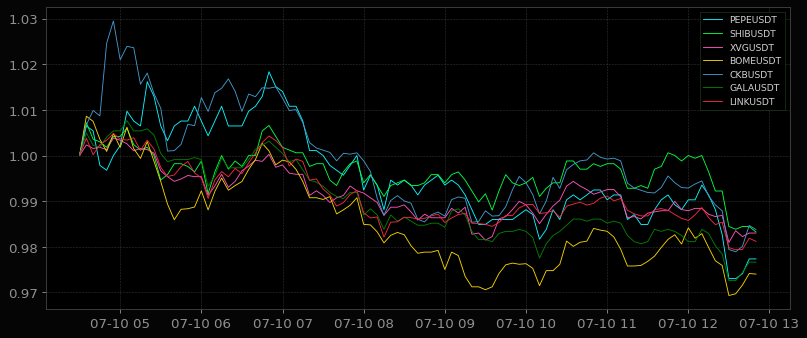

In [16]:
N = lambda x: x / x.iloc[0]
for s, hh in S.ohlcs('5Min').items():
    plt.plot(N(hh.close), label=s)
plt.legend()